<a href="https://colab.research.google.com/github/EinarRomero/Modulo-2-Modelos-Estadisticos/blob/main/PRACTICA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRÁCTICA 2

##Obtenemos el DataFrame

In [2]:
#Importamos las librerías necesarias para nuestra práctica
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import statsmodels.api as sm
from google.colab import autoviz
from google.colab import drive
import csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfme=pd.read_csv('/content/drive/MyDrive/MODULO 4 /Datos.csv')
dfme


,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O8,O9,O10,r,a,e,g,h,s,c
0,4,2,5,2,5,1,4,3,5,1,...,2,5,5,3,53.0,1.0,1,1,1,US
1,2,2,3,3,3,3,1,5,1,5,...,1,3,2,13,46.0,1.0,2,1,1,US
2,5,1,1,4,5,1,1,5,5,1,...,5,5,5,1,14.0,2.0,2,1,1,PK
3,2,5,2,4,3,4,3,4,4,5,...,2,5,5,3,19.0,2.0,2,1,1,RO
4,3,1,3,3,3,1,3,1,3,5,...,1,5,3,11,25.0,2.0,2,1,2,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19715,2,3,2,3,2,3,2,4,4,4,...,2,3,3,3,37.0,1.0,2,1,2,US
19716,2,5,4,5,5,5,1,2,1,5,...,5,5,5,5,16.0,2.0,1,1,2,US
19717,1,4,2,3,2,4,1,3,4,5,...,3,5,5,12,16.0,1.0,1,1,5,NG
19718,2,3,1,5,3,3,3,2,2,4,...,5,5,5,3,35.0,1.0,1,1,1,US


In [5]:
dfme.dtypes

,0
E1,int64
E2,int64
E3,int64
E4,int64
E5,int64
E6,int64
E7,int64
E8,int64
E9,int64
E10,int64


Notemos que python entiende nuestro dataframe en cada una de sus columnas como formatos flotante 64 bits y entero de 64 bits mayormente (formatos tipo numéricos), exceptuando la columna c, la cuál es de formato objeto dondé viene la abreviación de países,  para términos de descripción estadística nos servirá como índice en nuestro data frame y con ello poder entender los datos crudos. Asignemos el índice en nuestro dataframe.

In [6]:
dfme.set_index('c', inplace=True)
dfme

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O7,O8,O9,O10,r,a,e,g,h,s
c,,,,,,,,,,,,,,,,,,,,,
US,4,2,5,2,5,1,4,3,5,1,...,4,2,5,5,3,53.0,1.0,1,1,1
US,2,2,3,3,3,3,1,5,1,5,...,3,1,3,2,13,46.0,1.0,2,1,1
PK,5,1,1,4,5,1,1,5,5,1,...,5,5,5,5,1,14.0,2.0,2,1,1
RO,2,5,2,4,3,4,3,4,4,5,...,5,2,5,5,3,19.0,2.0,2,1,1
US,3,1,3,3,3,1,3,1,3,5,...,3,1,5,3,11,25.0,2.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,2,3,2,3,2,3,2,4,4,4,...,4,2,3,3,3,37.0,1.0,2,1,2
US,2,5,4,5,5,5,1,2,1,5,...,1,5,5,5,5,16.0,2.0,1,1,2
NG,1,4,2,3,2,4,1,3,4,5,...,5,3,5,5,12,16.0,1.0,1,1,5


##Estadísticas Descriptivas

Sabemos que la estadística descriptiva es un conjunto de técnicas que nos ayudan a entender y representar de manera númerica-gráfica las características principales como lo son tendencias, volatilidad etc., de nuestro dataframe.

In [7]:
#Veamos las primeras entradas o filas del dataframe
print(dfme.head())

    E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  ...  O7  O8  O9  O10   r     a  \
c                                            ...                              
US   4   2   5   2   5   1   4   3   5    1  ...   4   2   5    5   3  53.0   
US   2   2   3   3   3   3   1   5   1    5  ...   3   1   3    2  13  46.0   
PK   5   1   1   4   5   1   1   5   5    1  ...   5   5   5    5   1  14.0   
RO   2   5   2   4   3   4   3   4   4    5  ...   5   2   5    5   3  19.0   
US   3   1   3   3   3   1   3   1   3    5  ...   3   1   5    3  11  25.0   

      e  g  h  s  
c                 
US  1.0  1  1  1  
US  1.0  2  1  1  
PK  2.0  2  1  1  
RO  2.0  2  1  1  
US  2.0  2  1  2  

[5 rows x 56 columns]


In [8]:
#Veamos las estadísticas descriptivas de nuestro dataframe
print(dfme.describe())

                 E1            E2            E3            E4            E5  \
count  19720.000000  19720.000000  19720.000000  19720.000000  19720.000000   
mean       2.629006      2.759635      3.416785      3.151724      3.432302   
std        1.232573      1.313844      1.236796      1.222954      1.282019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      3.000000      2.000000      2.000000   
50%        3.000000      3.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      4.000000      4.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 E6            E7            E8            E9           E10  \
count  19720.000000  19720.000000  19720.000000  19720.000000  19720.000000   
mean       2.452535      2.867394      3.376369      3.094168      3.585497   
std        1.241627      1.431858      1.266477    

Analizando las columnas E1 a la columna E10 se nota que tienen una distribución que se agrupa mayormente en torno a valores bajos (entre 2 y 4), con pocas respuestas en los extremos(0 ó 5).
Las columnas O7 a O10 tienen una mayor variabilidad y valores más altos, especialmente en O9 (que llega hasta 11), lo que nos indica que tiene diferentes rangos o escalas.
Las variables r, a, e, g, h, y s tienen una mezcla de escalas numéricas, algunas de las cuales muestran una alta desviación estandar, por ejemplo, r y a, mientras que otras se concentran alrededor de valores bajos.

Se realizó un código estandár de un histograma para entender la distribución de cada columna de nuestro dataframe, así como un boxplot que nos apoya para entender de manera visual-gráfica la información de nuestro dataframe para con ello indentificar patrones estadísticos descriptivos como la mediana (la línea dentro de la caja), los rangos intercuartílicos, los outliers o valores atípicos (se representan en puntos) y la dispersión de los datos.

<Axes: >

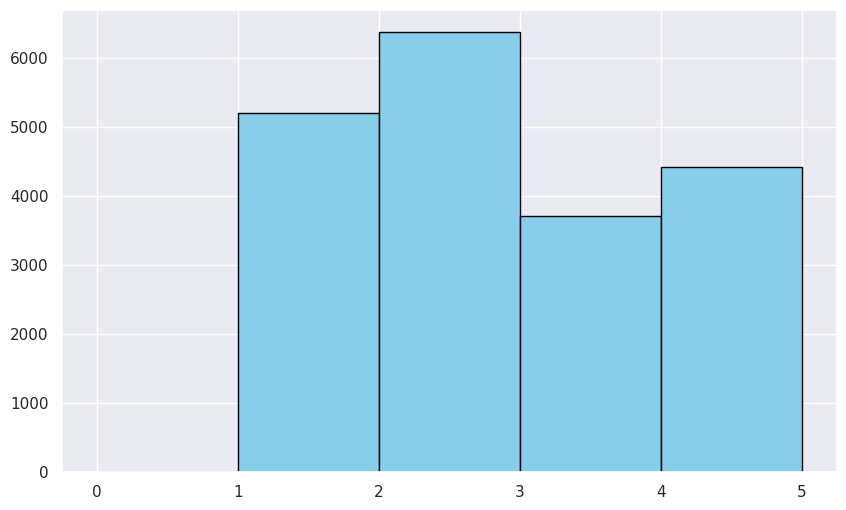

In [9]:
dfme['E6'].hist(bins=5, color='skyblue', edgecolor='black', figsize=(10, 6))

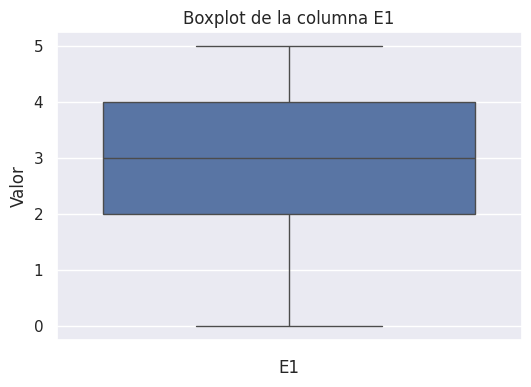

In [10]:
# Boxplot para la columna 'E1', nota: este
#código sirve para cada columna del dataframe
plt.figure(figsize=(6, 4))
sns.boxplot(y=dfme['E1'])
plt.title('Boxplot de la columna E1')
plt.xlabel('E1')
plt.ylabel('Valor')
plt.show()

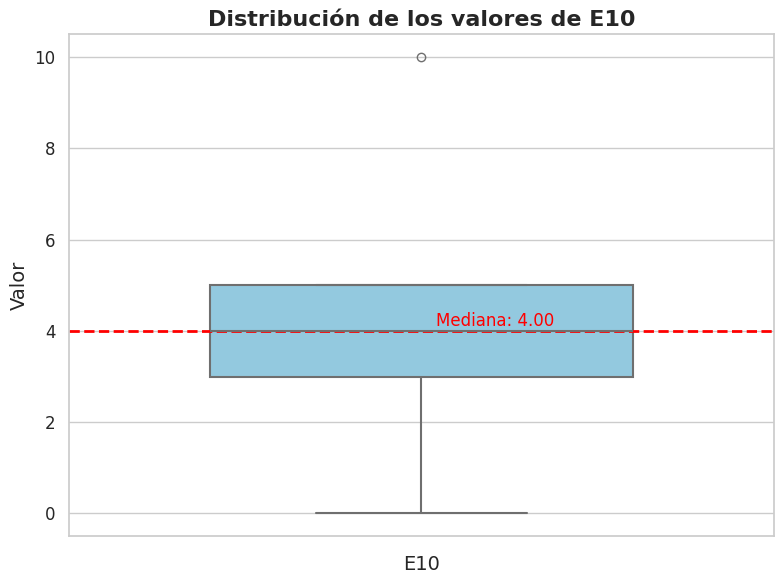

In [11]:
#Código más profesional pero no estándar
sns.set(style="whitegrid")  # Estilo con cuadrícula de fondo blanco

# Creamos una figura con tamaño adecuado
plt.figure(figsize=(8, 6))

# Creamos el boxplot con color personalizado y estilo
sns.boxplot(y=dfme['E10'],
            color='skyblue',  # Color del boxplot
            width=0.6,  # Ancho de la caja
            fliersize=6,  # Tamaño de los puntos atípicos
            linewidth=1.5)  # Grosor de las líneas

# Personalizamos el título y los ejes con mayor claridad y estilo
plt.title('Distribución de los valores de E10', fontsize=16, fontweight='bold')  # Título en negrita y más grande
plt.xlabel('E10', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Valor', fontsize=14)  # Etiqueta del eje Y

# Ajustamos los tamaños de los ticks para mayor legibilidad
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadimo una línea horizontal en la mediana para mayor visibilidad
median = dfme['E10'].median()  # Obtenemos la mediana
plt.axhline(median, color='red', linestyle='--', linewidth=2)  # Línea horizontal de la mediana

# Añadimos anotaciones a la mediana
plt.text(0.02, median + 0.1, f'Mediana: {median:.2f}', color='red', fontsize=12)

# Print a la gráfica
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


##Selección de las Variables-Representatividad

La selección de variables más representativas o relevantes en un DataFrame es un paso importante en el análisis de datos, ya que puede mejorar la interpretación de los datos así como la eficiencia de algún modelo. Para este dataframe (datos númericos) utilizaremos una selección que se basa en una correlación entre dos variables.

In [12]:
#Calculamos la matriz de correlación entre las variables
corr_matrix = dfme.corr()

# Encontramos los pares de variables altamente correlacionadas
#(mayores a 0.8 o menores a -0.8)
threshold = 0.8
correlated_vars = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_vars.add(colname)

print("Variables correlacionadas: ", correlated_vars)

Variables correlacionadas:  set()


Notemos que python nos indica que no se encontraron variables con una correlación superior al intervalo que se definió (en el código, el umbral fue 0.8). Esto significa que, en nuestro DataFrame, no hay pares de variables numéricas con una relación lineal muy fuerte (mayor a 0.8 o menor a -0.8). Seamos menos estrictos, bajemos el umbral a 0.5

In [13]:
#Calculamos la matriz de correlación entre las variables
corr_matrix = dfme.corr()

# Encontramos los pares de variables altamente correlacionadas
#(mayores a 0.5 o menores a -0.5)
threshold = 0.5
correlated_vars = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_vars.add(colname)

print("Variables correlacionadas: ", correlated_vars)

Variables correlacionadas:  {'O6', 'O8', 'O10', 'N10', 'E10', 'A9', 'A5', 'N3', 'E4', 'E5', 'A6', 'N8', 'E6', 'E9', 'C6', 'E7', 'N6', 'A7', 'O4', 'N7', 'N9'}


Siendo menos estrictos obtuvimos un conjunto de variables correlacionadas, ahora bien podemos crear una matriz de correlación de estas variables que identificamos para con ello entender la relación entre estas.

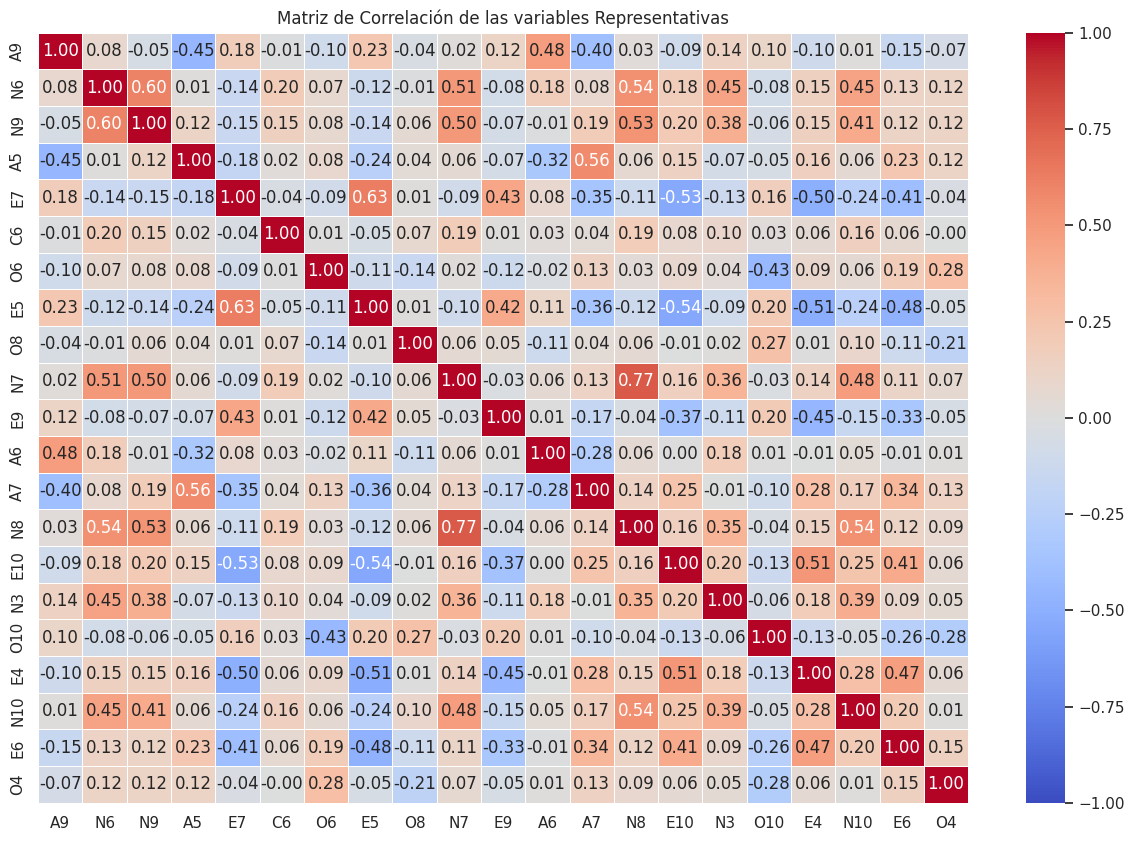

In [14]:
# Seleccionamos solo las columnas correlacionadas
correlation_matrix_subset = corr_matrix.loc[['A9', 'N6', 'N9', 'A5', 'E7', 'C6', 'O6', 'E5', 'O8', 'N7', 'E9', 'A6', 'A7', 'N8', 'E10', 'N3', 'O10', 'E4', 'N10', 'E6', 'O4'],
                                                   ['A9', 'N6', 'N9', 'A5', 'E7', 'C6', 'O6', 'E5', 'O8', 'N7', 'E9', 'A6', 'A7', 'N8', 'E10', 'N3', 'O10', 'E4', 'N10', 'E6', 'O4']]

# Graficar la matriz de correlación con un heatmap
plt.figure(figsize=(15, 10))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix_subset,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las variables Representativas')
plt.show()

Como podemos notar con la gráfica de correlación, nuestras variables más representativas por el nivel de correlación con otras variables son 'E7', 'E5', 'N6', 'N7', 'N8', 'N9', 'N10'; pareciera que las columnas de las "N" son las más correlacionadas, por tanto, tomaremos estas 7 variables como las más representativas.

Como observación, es importante tener en cuenta que las variables con varianza alta por experiencia son las más informativas, ya que tienen más "discriminación" para diferenciar entre las observaciones. Las variables con baja varianza pueden no ser útiles, ya que no aportan mucha información. Veamos la varianza de estas variables númericamente y gráficamente.

In [15]:
# Calcular la varianza de cada columna
variances = dfme.var()

# Seleccionar las variables con varianza mayor que un umbral (por ejemplo, 1.5)
selected_features = variances[variances > 1.5].index.tolist()
print("Variables con alta varianza:", selected_features)

Variables con alta varianza: ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'C2', 'C4', 'C5', 'C6', 'C9', 'O8', 'r', 'a', 's']


Por lo tanto, mediante un análisis de correlación y alta varianza de las variables podemos concluir que nuestras variables representativas para nuestro conjunto de datos son 'E7', 'E5', 'N6', 'N7', 'N8', 'N9', 'N10'.

##Visualización de las Variables Representativas

Para este punto de la práctica, graficaremos un pairplot el cuál nos muestra la dispersión entre nuestras variables numéricas, analizando la relación entre ellas, así como un gráfico de regresión lineal, tomando como punto de partida la matriz de correlación del inciso pasado; cómo se relaciona de manera lineal las variables altamentente correlacionadas,así como un boxplot para poder visualizar si nuestras variables representativas tienen outliers y con ello poder determinar si es necesario aplicar transformaciones para estos datos inconsistentes.

###Gráfico de dispersión multivariable para nuestras variables representativas

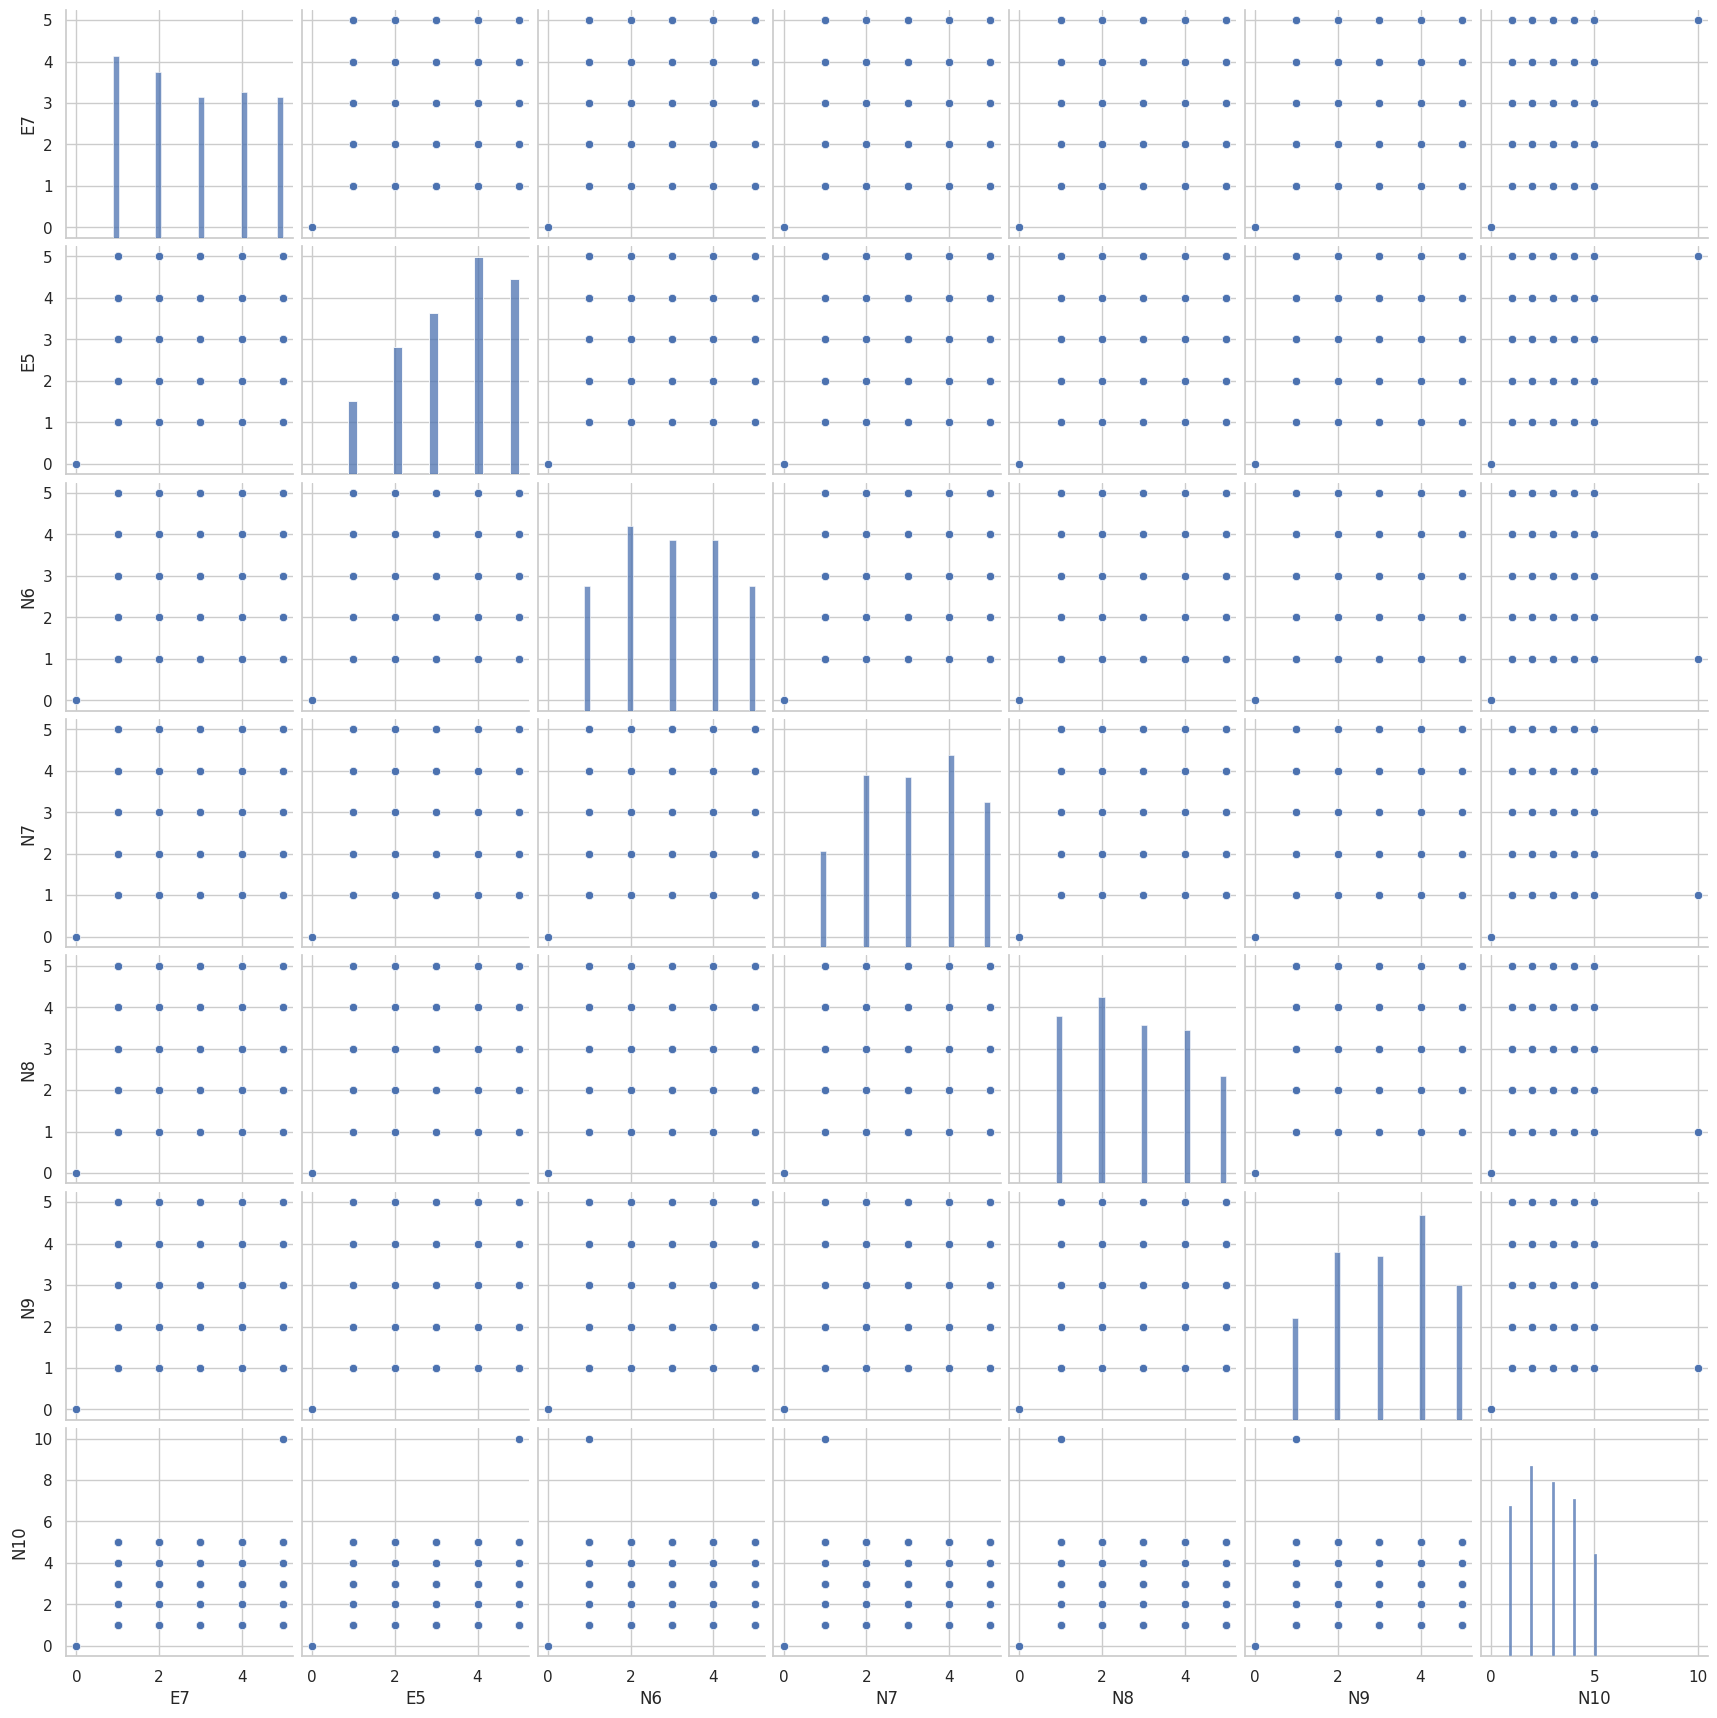

In [16]:
# Pairplot para ver las relaciones entre nuestras variables representativas
sns.pairplot(dfme[['E7', 'E5', 'N6', 'N7', 'N8', 'N9', 'N10']])
plt.show()


Como podemos ver en la gráfica anterior para todas las variables representativas los puntos están altamente dispersos sin un patrón claro, lo que nos significa que no hay una relación tan clara entre cada par de variables que se graficaron. Asimismo podemos identificar en la diagonal principal los gráficos de distribución de cada variable, observando que la concentración de los datos se encuentra en el intervalo de 2 a 4. Por otra parte, fuera de la diagonal principal, detectamos outliers, los cuales se encuentran fuera de la dispersión, alejados y en las esquinas.

###Gráfico de relación lineal

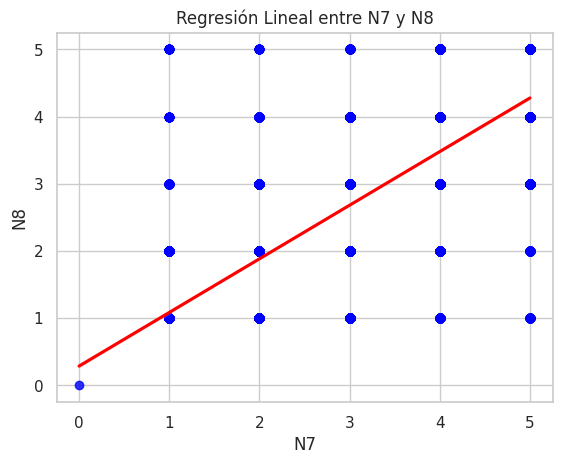

In [17]:
# Regplot para la relación entre 'N7' y 'N8'
sns.regplot(x='N7', y='N8', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre N7 y N8')
plt.show()


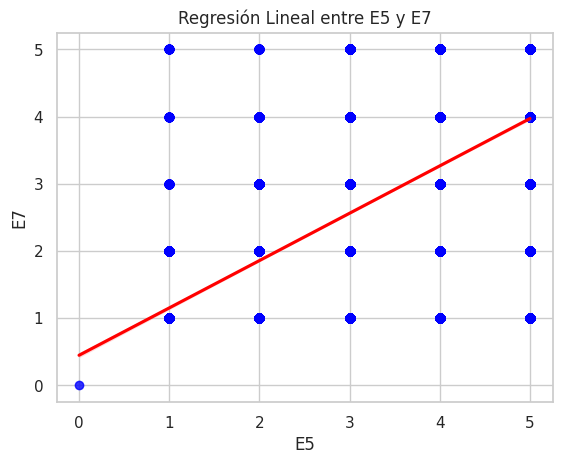

In [18]:
# Regplot para la relación entre 'E5' y 'E7'
sns.regplot(x='E5', y='E7', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre E5 y E7')
plt.show()

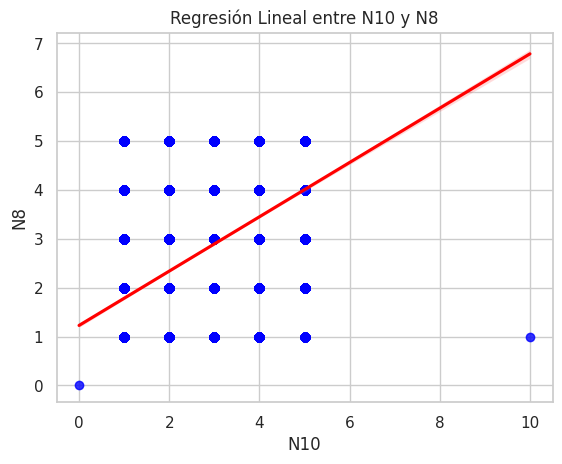

In [19]:
# Regplot para la relación entre 'N10' y 'N8'
sns.regplot(x='N10', y='N8', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre N10 y N8')
plt.show()

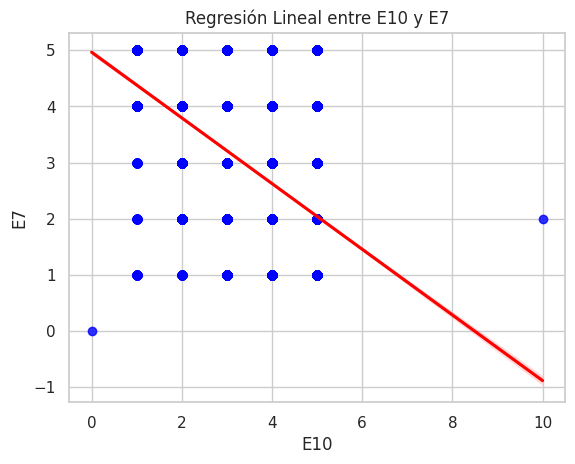

In [20]:
# Regplot para la relación entre 'E10' y 'E7'
sns.regplot(x='E10', y='E7', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre E10 y E7')
plt.show()

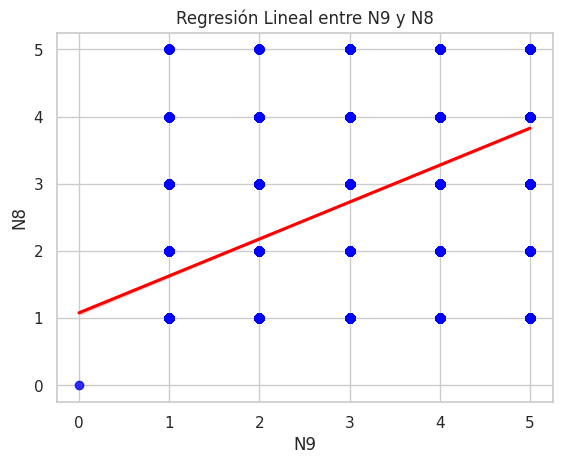

In [21]:
# Regplot para la relación entre 'N9' y 'N8'
sns.regplot(x='N9', y='N8', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre N9 y N8')
plt.show()

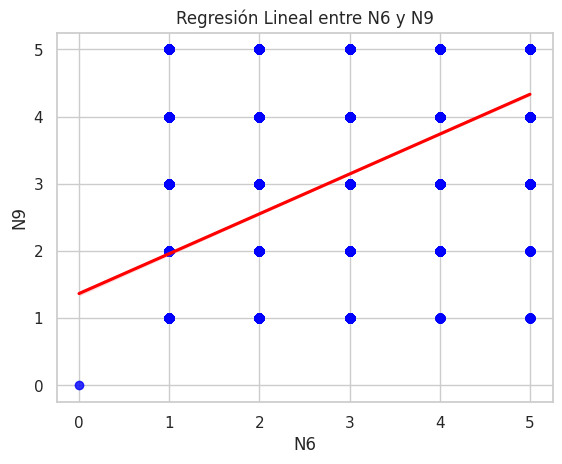

In [22]:
# Regplot para la relación entre 'N6' y 'N9'
sns.regplot(x='N6', y='N9', data=dfme, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regresión Lineal entre N6 y N9')
plt.show()

Como podemos notar en nuestros gráficos de regresión lineal explica que la relación lineal entre nuestras variables representativas es positiva, es decir, conforme va aumentando una variable la otra también, asimismo existen una relación negativa entre las variables 'E10' y 'E7'.

###Gráfico de caja

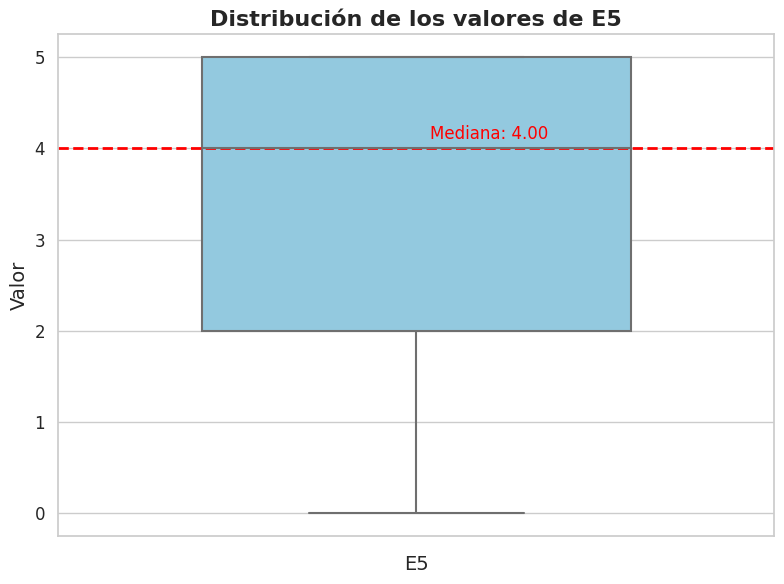

In [23]:
sns.set(style="whitegrid")  # Estilo con cuadrícula de fondo blanco

# Creamos una figura con tamaño adecuado
plt.figure(figsize=(8, 6))

# Creamos el boxplot con color personalizado y estilo
sns.boxplot(y=dfme['E5'],
            color='skyblue',  # Color del boxplot
            width=0.6,  # Ancho de la caja
            fliersize=6,  # Tamaño de los puntos atípicos
            linewidth=1.5)  # Grosor de las líneas

# Personalizamos el título y los ejes con mayor claridad y estilo
plt.title('Distribución de los valores de E5', fontsize=16, fontweight='bold')  # Título en negrita y más grande
plt.xlabel('E5', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Valor', fontsize=14)  # Etiqueta del eje Y

# Ajustamos los tamaños de los ticks para mayor legibilidad
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadimo una línea horizontal en la mediana para mayor visibilidad
median = dfme['E5'].median()  # Obtenemos la mediana
plt.axhline(median, color='red', linestyle='--', linewidth=2)  # Línea horizontal de la mediana

# Añadimos anotaciones a la mediana
plt.text(0.02, median + 0.1, f'Mediana: {median:.2f}', color='red', fontsize=12)

# Print a la gráfica
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


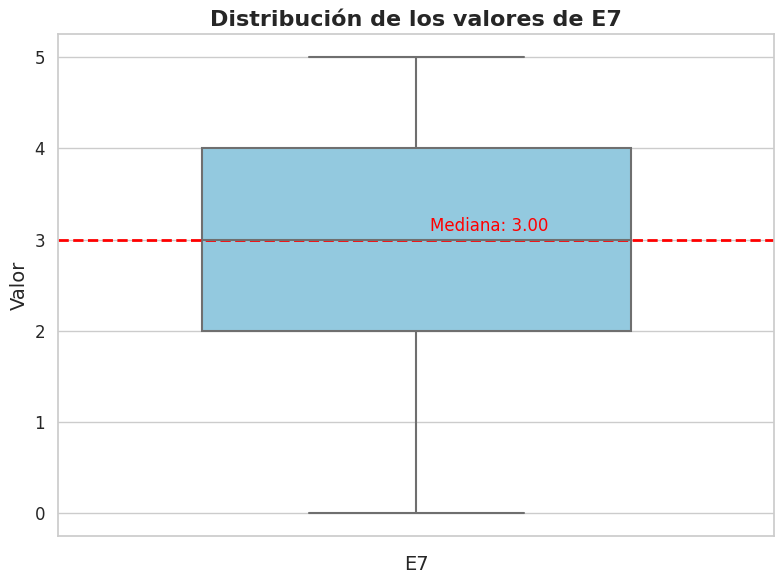

In [24]:
sns.set(style="whitegrid")  # Estilo con cuadrícula de fondo blanco

# Creamos una figura con tamaño adecuado
plt.figure(figsize=(8, 6))

# Creamos el boxplot con color personalizado y estilo
sns.boxplot(y=dfme['E7'],
            color='skyblue',  # Color del boxplot
            width=0.6,  # Ancho de la caja
            fliersize=6,  # Tamaño de los puntos atípicos
            linewidth=1.5)  # Grosor de las líneas

# Personalizamos el título y los ejes con mayor claridad y estilo
plt.title('Distribución de los valores de E7', fontsize=16, fontweight='bold')  # Título en negrita y más grande
plt.xlabel('E7', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Valor', fontsize=14)  # Etiqueta del eje Y

# Ajustamos los tamaños de los ticks para mayor legibilidad
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadimo una línea horizontal en la mediana para mayor visibilidad
median = dfme['E7'].median()  # Obtenemos la mediana
plt.axhline(median, color='red', linestyle='--', linewidth=2)  # Línea horizontal de la mediana

# Añadimos anotaciones a la mediana
plt.text(0.02, median + 0.1, f'Mediana: {median:.2f}', color='red', fontsize=12)

# Print a la gráfica
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


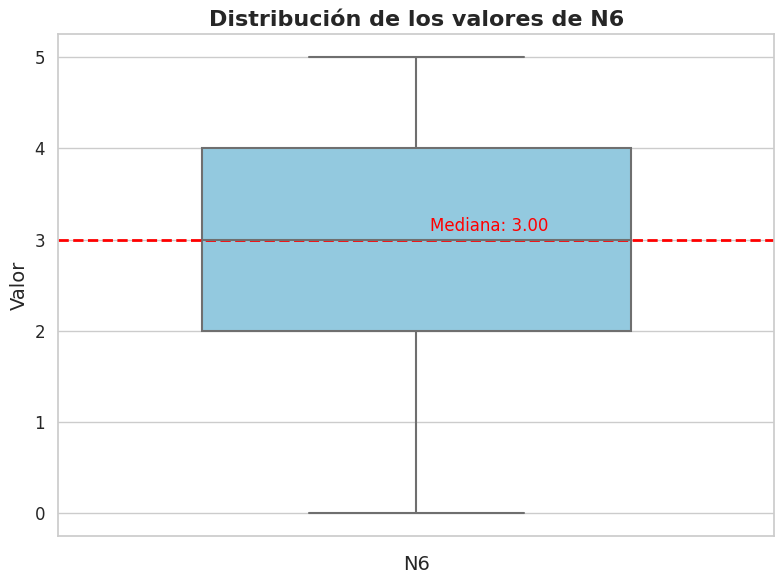

In [25]:
sns.set(style="whitegrid")  # Estilo con cuadrícula de fondo blanco

# Creamos una figura con tamaño adecuado
plt.figure(figsize=(8, 6))

# Creamos el boxplot con color personalizado y estilo
sns.boxplot(y=dfme['N6'],
            color='skyblue',  # Color del boxplot
            width=0.6,  # Ancho de la caja
            fliersize=6,  # Tamaño de los puntos atípicos
            linewidth=1.5)  # Grosor de las líneas

# Personalizamos el título y los ejes con mayor claridad y estilo
plt.title('Distribución de los valores de N6', fontsize=16, fontweight='bold')  # Título en negrita y más grande
plt.xlabel('N6', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Valor', fontsize=14)  # Etiqueta del eje Y

# Ajustamos los tamaños de los ticks para mayor legibilidad
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadimo una línea horizontal en la mediana para mayor visibilidad
median = dfme['N6'].median()  # Obtenemos la mediana
plt.axhline(median, color='red', linestyle='--', linewidth=2)  # Línea horizontal de la mediana

# Añadimos anotaciones a la mediana
plt.text(0.02, median + 0.1, f'Mediana: {median:.2f}', color='red', fontsize=12)

# Print a la gráfica
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


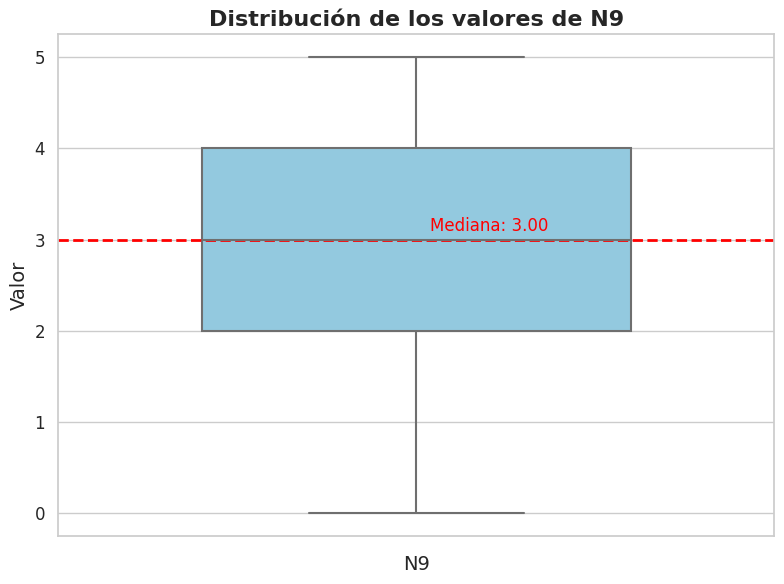

In [26]:
sns.set(style="whitegrid")  # Estilo con cuadrícula de fondo blanco

# Creamos una figura con tamaño adecuado
plt.figure(figsize=(8, 6))

# Creamos el boxplot con color personalizado y estilo
sns.boxplot(y=dfme['N9'],
            color='skyblue',  # Color del boxplot
            width=0.6,  # Ancho de la caja
            fliersize=6,  # Tamaño de los puntos atípicos
            linewidth=1.5)  # Grosor de las líneas

# Personalizamos el título y los ejes con mayor claridad y estilo
plt.title('Distribución de los valores de N9', fontsize=16, fontweight='bold')  # Título en negrita y más grande
plt.xlabel('N9', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Valor', fontsize=14)  # Etiqueta del eje Y

# Ajustamos los tamaños de los ticks para mayor legibilidad
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadimo una línea horizontal en la mediana para mayor visibilidad
median = dfme['N9'].median()  # Obtenemos la mediana
plt.axhline(median, color='red', linestyle='--', linewidth=2)  # Línea horizontal de la mediana

# Añadimos anotaciones a la mediana
plt.text(0.02, median + 0.1, f'Mediana: {median:.2f}', color='red', fontsize=12)

# Print a la gráfica
plt.tight_layout()  # Ajustar el layout para evitar que se solapen los elementos
plt.show()


##Determinación de valores faltantes por atributo

Determinemos los valores faltantes (NaN o None o cualquier otro valor) en un DataFrame, así que se escribió un código que devuelve un DataFrame de valores booleanos donde True indica que el valor es faltante.

In [27]:
# Verificamos valores faltantes por columna
missing_values = dfme.isna().sum()

# Mostramos los resultados
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
O1     0
O2     0
O3     0
O4     0
O5     0
O6     0
O7     0
O8     0
O9     0
O10    0
r      0
a      1
e      1
g      0
h      0
s      0
dtype: int64


In [28]:
#Mostramos las columnas con los valores faltantes
missing_columns = missing_values[missing_values > 0]

print("Columnas con valores faltantes:")
print(missing_columns)

Columnas con valores faltantes:
a    1
e    1
dtype: int64


Notamos que solo dos columnas de nuestro dataframe tienen valores faltantes y solo es un valor por columna, esto nos quiere decir que no será necesario realizar un proceso de limpieza de valores nulos o líneas en blanco, lo cuál se justificará más adelante.

##Determinación y ejemplificación de la consistencia y transformación de nuestros registros

Para poder determinar si podemos eliminar registros inconsistentes en un DataFrame es dependiendo de varios factores, como el contexto de nuestros datos y que tán representativos son los registros del DataFrame. Antes de decidir si eliminamos los registros,  en base en mi experiencia es necesario comprender por qué son inconsistentes, lo cuál ya se realizó en los puntos pasados, al parecer no se nos indican a qué conjunto de datos pertenecen, pero parecen ser de una encuesta cualitativa, en forma de escalas. Así para los registros inconsistentes se asume que son parte de un fenómeno real y no un error, y que representan una parte pequeña del conjunto de datos lo cual puede ser valioso conservarlos. Asimismo como nuestros registros inconsistentes representan una pequeña fracción del conjunto de datos, pues realmente no afectan significativamente la distribución o el análisis, es por ello que se considerará mantenerlos en lugar de eliminarlos.

Para realizar la transformación de nuestros datos, transformaremos los valores atípicos u outliers y asignaremos la mediana, utilizando un criterio del rango intercuartil para poder definir los outliers del dataframe.

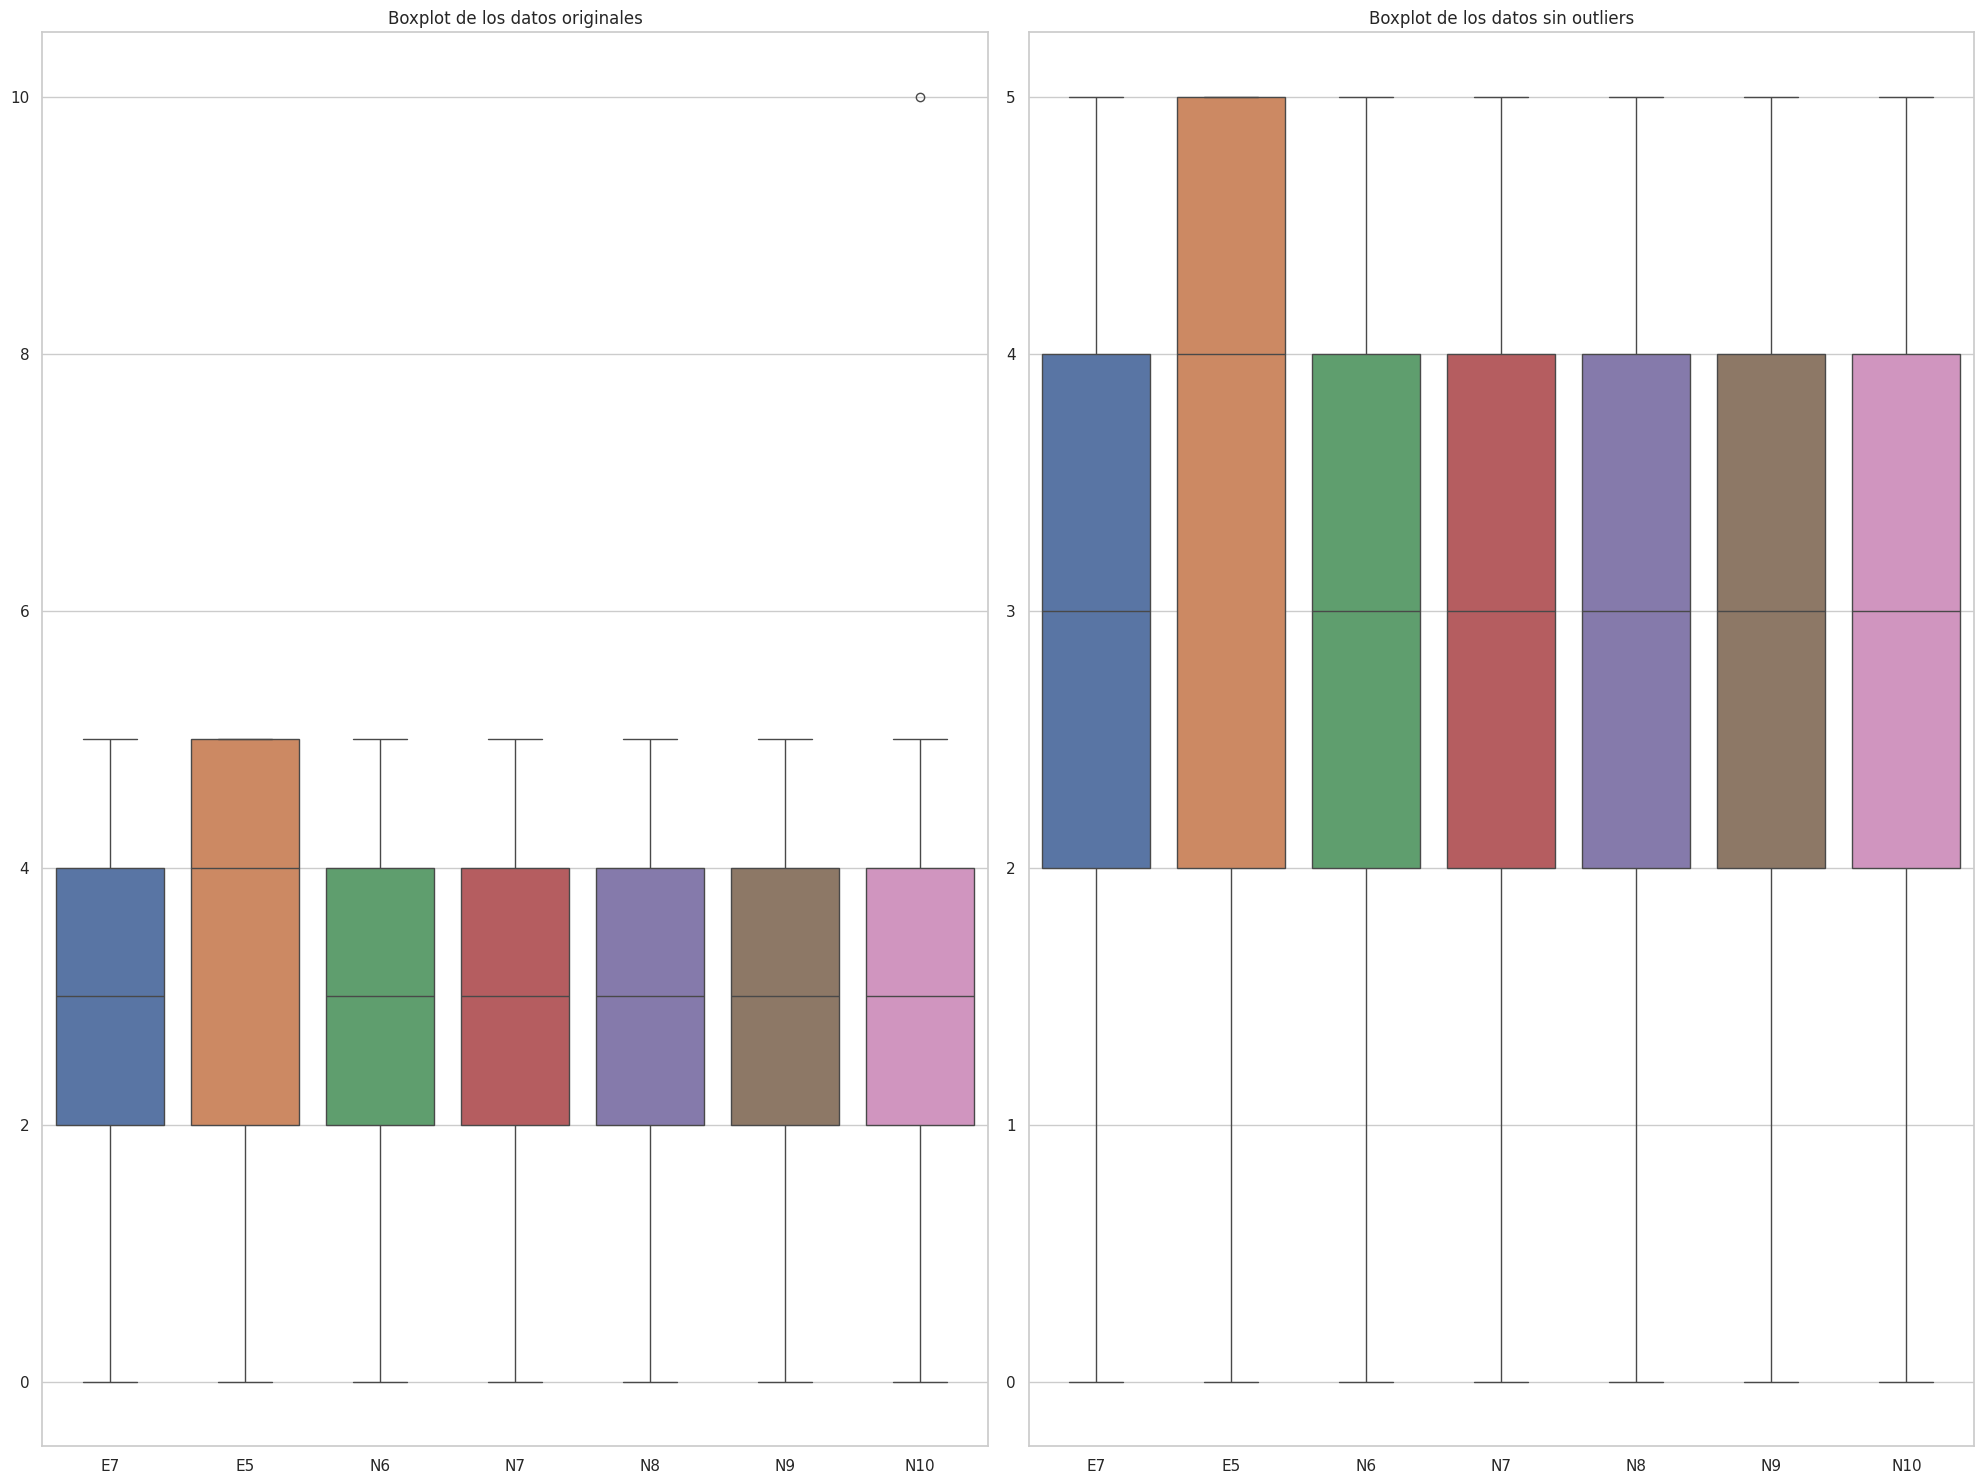

In [45]:
# Seleccionamos las columnas de interés
columnas_interes = ['E7', 'E5', 'N6', 'N7', 'N8', 'N9', 'N10']

# Calculamos la mediana de las columnas seleccionadas
medianas = dfme[columnas_interes].median()

# Calculamos el umbral para identificar outliers (usando el IQR)
Q1 = dfme[columnas_interes].quantile(0.25)
Q3 = dfme[columnas_interes].quantile(0.75)
IQR = Q3 - Q1
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Reemplazamos los outliers por la mediana
df_sin_outliers = dfme[columnas_interes].apply(
    lambda x: x.where((x >= umbral_inferior[x.name]) & (x <= umbral_superior[x.name]), medianas[x.name])
)

# Visualización de los datos originales y sin outliers
plt.figure(figsize=(20, 15))

# Visualización de los datos originales
plt.subplot(1, 2, 1)
sns.boxplot(data=dfme[columnas_interes])
plt.title('Boxplot de los datos originales')

# Visualización de los datos sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sin_outliers)
plt.title('Boxplot de los datos sin outliers')

plt.tight_layout()
plt.show()


Notemos que gráficamente el eliminar outliers facilita la interpretación de los datos que consideramos como las variables representativas, es por tanto que el transformar los outliers asignandoles la mediana resulto útil.

##Matriz de Correlación de 9 variables

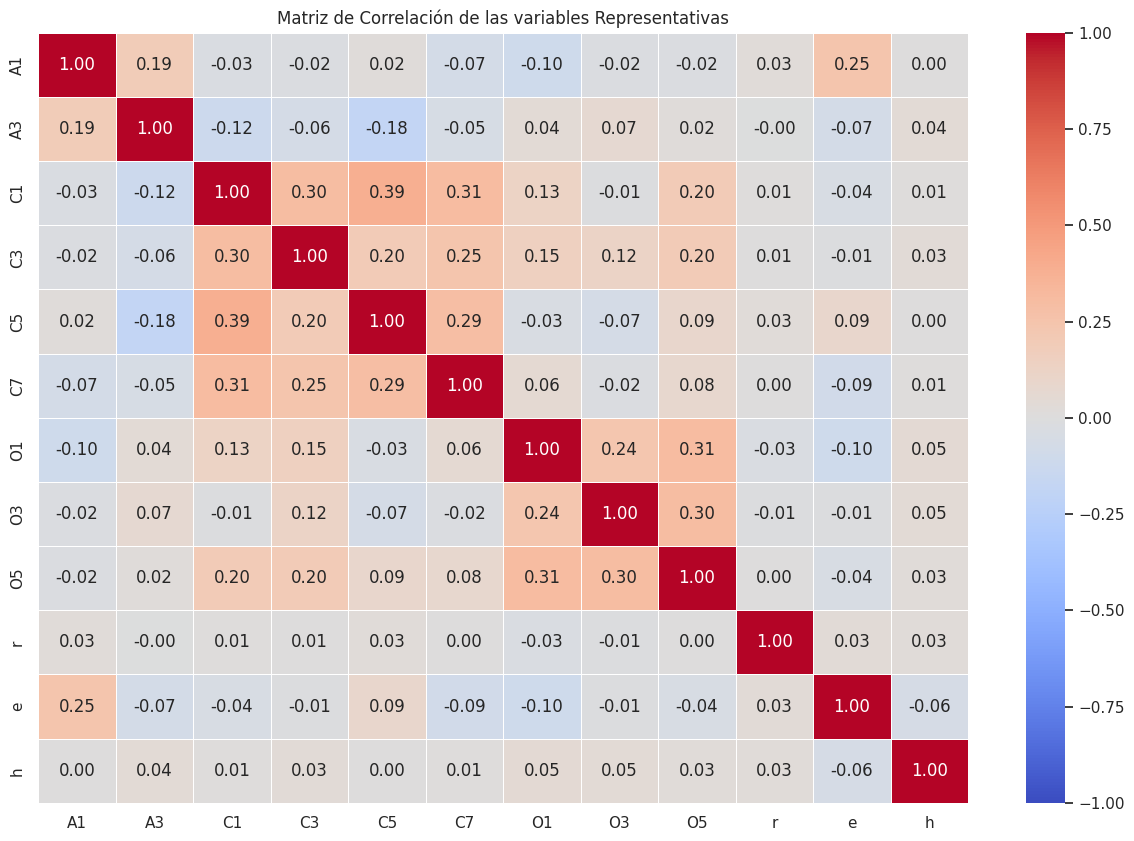

In [46]:
# Seleccionamos solo las columnas correlacionadas
correlation_matrix_subset = corr_matrix.loc[['A1', 'A3', 'C1', 'C3', 'C5', 'C7', 'O1', 'O3', 'O5', 'r', 'e', 'h'],
                                                   ['A1', 'A3', 'C1', 'C3', 'C5', 'C7', 'O1', 'O3', 'O5', 'r', 'e', 'h']]

# Graficar la matriz de correlación con un heatmap
plt.figure(figsize=(15, 10))  # Ajustar el tamaño de la figura
sns.heatmap(correlation_matrix_subset,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las variables Representativas')
plt.show()

Realizamos una gráfica de correlación a otras variables que no se analizaron en está práctica, como podemos notar en la diagonal de la matriz tenemos la correlación igual a 1, esto significa que las variables consigo misma se relaciona al 100%. Por otra parte notamos en esta gráfica que las correlaciones no son significativas, ie, son correlaciones bajas o nulas dependiendo el tacto y experiencia del analista, a mi parecer las variables que aparecen en este diagrama no tienen correlación y pueden ser útiles para realizar un modelo de predicción, esto debido a que cuando las variables que se correlación fuerte, puede causar multicolinealidad en las variables predictoras, lo que significa que algunas de las variables predictoras están fuertemente relacionadas entre sí, lo que puede causar varios problemas en el análisis y la interpretación de los resultados, por tanto podemos concluir para esta práctica que estas variables seleccionadas y definiendo una variable objetivo, pueden ser utilizadas para algún modelo de regresión u otro estadístico.